In [ ]:
# 50 Startups csv 파일을 가지고, 딥러닝 이용해서 학습하고, 평가까지 해보세요.

In [1]:
import numpy as np
import pandas as pd


In [2]:
import os 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/ml_plus/data')

In [5]:
df = pd.read_csv('50_Startups.csv')

In [6]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [7]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
X = df.iloc[ : ,  0:-2+1  ]

In [9]:
y = df['Profit']

In [10]:
X.head(2)

,R&D Spend,Administration,Marketing Spend,State
0,165349.2,136897.80,471784.10,New York
1,162597.7,151377.59,443898.53,California


In [11]:
y.head(2)

0    192261.83
1    191792.06
Name: Profit, dtype: float64

In [13]:
X['State'].nunique()

3

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
from sklearn.compose import ColumnTransformer

In [16]:
ct = ColumnTransformer([('encoder', OneHotEncoder(), [3])] , remainder='passthrough')

In [19]:
X = ct.fit_transform(X.values)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler_X = MinMaxScaler()

In [25]:
scaler_y = MinMaxScaler()

In [27]:
X = scaler_X.fit_transform(X)

In [31]:
y.values.shape

(50,)

In [33]:
y = scaler_y.fit_transform(y.values.reshape(50,1) )

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [36]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [38]:
X_train.shape

(40, 6)

In [39]:
def build_model():
  model = Sequential()
  model.add( Dense(units=10, activation='relu', input_shape=(6,) )  )
  model.add( Dense(units=10, activation='relu'))
  model.add( Dense(units=1, activation='linear'))
  model.compile('adam', 'mean_squared_error')
  return model

In [51]:
model = build_model()

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [42]:
X_train.shape

(40, 6)

In [52]:
epoch_history = model.fit(X_train, y_train, batch_size = 10, epochs = 35 )

Epoch 1/35
4/4 [==============================] - 0s 4ms/step - loss: 0.4668
Epoch 2/35
4/4 [==============================] - 0s 4ms/step - loss: 0.4331
Epoch 3/35
4/4 [==============================] - 0s 3ms/step - loss: 0.3992
Epoch 4/35
4/4 [==============================] - 0s 5ms/step - loss: 0.3703
Epoch 5/35
4/4 [==============================] - 0s 3ms/step - loss: 0.3397
Epoch 6/35
4/4 [==============================] - 0s 6ms/step - loss: 0.3112
Epoch 7/35
4/4 [==============================] - 0s 3ms/step - loss: 0.2817
Epoch 8/35
4/4 [==============================] - 0s 3ms/step - loss: 0.2591
Epoch 9/35
4/4 [==============================] - 0s 3ms/step - loss: 0.2347
Epoch 10/35
4/4 [==============================] - 0s 3ms/step - loss: 0.2161
Epoch 11/35
4/4 [==============================] - 0s 4ms/step - loss: 0.1997
Epoch 12/35
4/4 [==============================] - 0s 3ms/step - loss: 0.1859
Epoch 13/35
4/4 [==============================] - 0s 3ms/step - loss: 0.

In [56]:
type(epoch_history.history)

dict

In [58]:
epoch_history.history.keys()

dict_keys(['loss'])

In [59]:
epoch_history.history['loss']

[0.4668245315551758,
 0.43311968445777893,
 0.3991757333278656,
 0.3702681064605713,
 0.3396643102169037,
 0.31116366386413574,
 0.2816953659057617,
 0.2591342329978943,
 0.2346968650817871,
 0.2161436527967453,
 0.19965533912181854,
 0.18585428595542908,
 0.17302030324935913,
 0.16158510744571686,
 0.15108062326908112,
 0.14066588878631592,
 0.13143853843212128,
 0.12099267542362213,
 0.11114285886287689,
 0.10265626013278961,
 0.09515655785799026,
 0.08787207305431366,
 0.08240918070077896,
 0.07796373963356018,
 0.07316846400499344,
 0.06863932311534882,
 0.06517116725444794,
 0.06146881729364395,
 0.0578923299908638,
 0.055013567209243774,
 0.05225487798452377,
 0.04918282851576805,
 0.04657156392931938,
 0.04431188851594925,
 0.04165457934141159]

In [53]:
import matplotlib.pyplot as plt

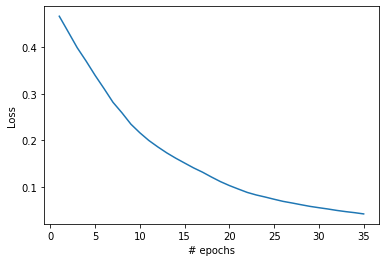

In [62]:
plt.plot( np.arange(1, 35+1),  epoch_history.history['loss']  )
plt.xlabel('# epochs')
plt.ylabel('Loss')
plt.show()

In [63]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 364ms/step - loss: 0.0434


0.04342128336429596

In [ ]:
# 새로운 신규 회사가 있는데, 플로리다에 있고, 운영비는 2십만 달라, 
# 연구개발비는 25만달라, 마케팅비는 38만달러를 쓰고 있다.
# 이회사의 수익을 예측하시오.

In [67]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [66]:
df.head(1)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.8,471784.1,New York,192261.83


In [68]:
new_data = np.array([250000, 200000, 380000, 'Florida'])

In [71]:
new_data = new_data.reshape(1, 4)

In [73]:
new_data = ct.transform(new_data)

In [76]:
new_data = scaler_X.transform(new_data)

In [78]:
y_pred = model.predict(new_data)

1/1 [==============================] - 0s 20ms/step


In [80]:
scaler_y.inverse_transform(y_pred)

array([[158982.14]], dtype=float32)